In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [59]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                        n_clusters_per_class=1,n_redundant=0)

In [60]:
X[:5]

array([[-2.13713023,  1.46398999],
       [-0.18625166,  0.43437492],
       [ 1.45415679, -0.71107798],
       [-0.58023267,  1.02774798],
       [-3.10049558,  1.91082428]])

In [61]:
y[:5]

array([0, 0, 1, 0, 0])

<Axes: xlabel='Feature1', ylabel='Feature2'>

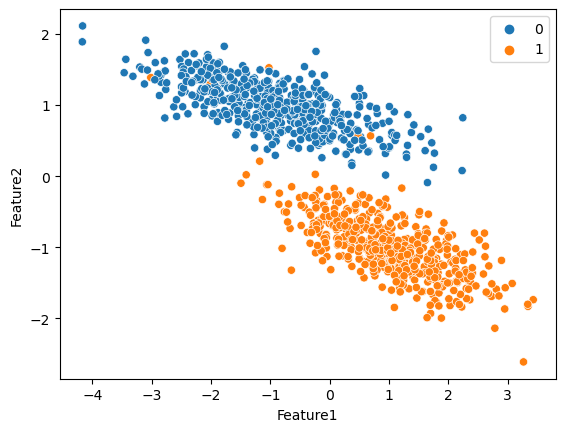

In [62]:
# linearly separable data points --> SVC should be good with 'linear' kernel
# if not linearly seperable we can check with diffrent kernels like 'rbf','polynomial','sigmoid'.....
sns.scatterplot(data=pd.DataFrame(X, columns=['Feature1', 'Feature2']), x="Feature1", y="Feature2", hue=y)

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [64]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [65]:
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy : ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.99      1.00       142

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

Accuracy :  0.996


In [75]:
svc.coef_,svc.intercept_

(array([[-0.41898226, -3.12595929]]), array([0.1788238]))

In [67]:
# after selecting the kernel properly we can do hyperparameter tuning
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}

In [69]:
grid = GridSearchCV(SVC(),param_grid=param_grid,cv=5,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.993 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.993 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.993 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.993 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.993 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.993 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             verbose=3)

In [70]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [72]:
y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy : ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.99      1.00       142

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

Accuracy :  0.996
